### Plot emittance growth rates for different studies, uploaded from a pickle file

In [8]:
import sys
sys.path.append('../../utils/')
from cmptTheoreticalEmitGrowth import *
from bunchLengthConversions import *
import pickle
import numpy as np
import matplotlib.pyplot as plt

#### Plotting paramerters

In [9]:
params = {'legend.fontsize': 20,
          'figure.figsize': (9.5, 8.5),
          'axes.labelsize': 27,
          'axes.titlesize': 23,
          'xtick.labelsize': 27,
          'ytick.labelsize': 27,
          'image.cmap': 'jet',
          'lines.linewidth': 1,
          'lines.markersize': 10,
          'font.family': 'sans-serif'}

plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.rcParams.update(params)

#### 1) Define study parameters

In [10]:
n_runs = 4 # number of runs that the simulation was repeated
turns = 5e5
f_rev = 43375.86 # [Hz] The revolution frequency of the machine 
turns_list = np.arange(0,turns)
time = turns_list/f_rev # [s], type: list

In [18]:
my_variables = list(np.arange(0.0, 5.5, 0.5))
# my_variables = ['']
print(my_variables)

[0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]


#### 2) Load data

In [19]:
path_to_data = './'
study_name = 'deyRates_globalCC2deg90_1MV_realNoise_PNCoast3PartC_noKlofKlod_5e5turns_Nb20k_b3b5b7_QpyQpxIterate_v2'
noise_type = 'PN'

my_df = pickle.load( open(path_to_data+study_name+'.pkl', "rb" ) )

In [20]:
my_df

,QxQy_0.0,QxQy_0.5,QxQy_1.0,QxQy_1.5,QxQy_2.0,QxQy_2.5,QxQy_3.0,QxQy_3.5,QxQy_4.0,QxQy_4.5,QxQy_5.0
m,"[1.8579607333418005e-08, 1.9118811879079198e-0...","[1.768397702440738e-08, 1.868086311955104e-08,...","[1.9506980235073217e-08, 1.926036013700152e-08...","[1.8234239656554322e-08, 1.834801369979531e-08...","[1.7324692669549117e-08, 1.9353467142039512e-0...","[1.7711553399245403e-08, 1.9545688261733622e-0...","[1.8539150911256004e-08, 1.9695956168538926e-0...","[1.778888733527382e-08, 1.8775675810436506e-08...","[1.7748155273274363e-08, 1.9766605957840362e-0...","[1.9234902839582404e-08, 1.8202686017111465e-0...","[1.7837606015837998e-08, 1.9099345816666345e-0..."
b,"[2.0736063809427013e-06, 2.0379210959833684e-0...","[2.0687533520282606e-06, 2.0778008771302922e-0...","[2.075484068673724e-06, 2.0232483272944422e-06...","[2.0743603352154786e-06, 2.044936294284583e-06...","[2.066364118206511e-06, 2.0557658615531337e-06...","[2.0611336725207108e-06, 2.044809219868234e-06...","[2.062261869127865e-06, 2.0663474834944483e-06...","[2.056445883412511e-06, 2.058843774440067e-06,...","[2.0505700418319066e-06, 2.061199876889767e-06...","[2.066887892855478e-06, 2.086955542010746e-06,...","[2.0801530562069598e-06, 2.0561552602894708e-0..."
err,"[2.112164252429388e-12, 2.0284595781221647e-12...","[2.001746376785059e-12, 1.886715029104071e-12,...","[2.4660237856247305e-12, 2.2053521447341417e-1...","[2.26430615805821e-12, 2.1995690312772785e-12,...","[2.126066427652568e-12, 1.8412061109911795e-12...","[1.834704062157226e-12, 2.641402686535352e-12,...","[2.5582299616206412e-12, 2.2005390279897907e-1...","[2.652713262407435e-12, 2.3804388412447497e-12...","[2.5680022506252876e-12, 2.41017617363454e-12,...","[3.164346963806826e-12, 2.9002405110106093e-12...","[2.874022379878218e-12, 2.764804067364327e-12,..."


In [21]:
my_df_keys = list(my_df.keys())

In [22]:
my_df[my_df_keys[7]]['m']

[1.778888733527382e-08,
 1.8775675810436506e-08,
 1.8909112427597114e-08,
 2.0516065687565003e-08]

Text(0.5, 0, 'Vertical chromaticity, Qpy')

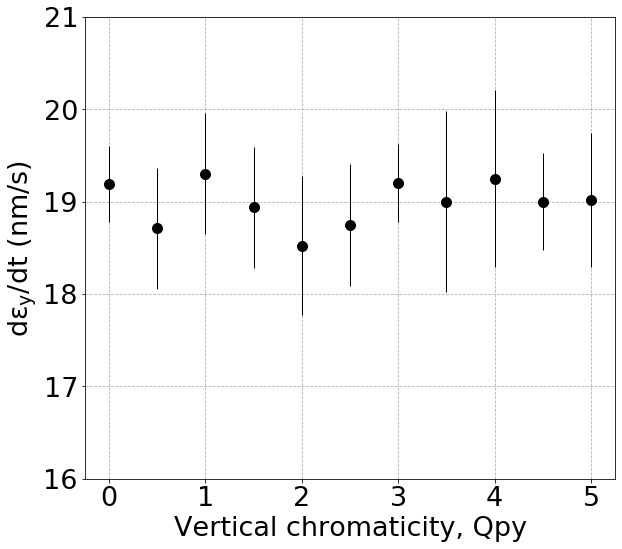

In [23]:
for i, key in enumerate(my_df_keys):
    plt.errorbar(my_variables[i], np.mean(my_df[my_df_keys[i]]['m'])*1e9, yerr=np.std(my_df[my_df_keys[i]]['m'])*1e9, marker='o',  c='k')
    
plt.ylim(16, 21)
plt.grid(linestyle='dashed')
plt.ylabel(r'$\mathrm{d\epsilon_y / dt \ (nm/s)}$')
plt.xlabel('Vertical chromaticity, Qpy')

### Compute the theoretically expected growth 

In [24]:
# Machine parameters
betay = 73 # 73 m at CC2, 76 m at CC1
Vcc = 1e6 # V
Eb = 270e9 # eV
beta_0 = 0.999999
gamma_0 = 287.7
sigma_z = 0.139 # m
f_CC = 400.789e6 # CC frequency in Hz
clight = 299792458 # m/s
circumference = 6911.5623
frev = clight/circumference # Hz
A_phase = 1e-8 # rms kick in the simulation of the phase noise
A_amplitude = 0 # rms kick in the simulation of the amplitude noise
scale_factor = Eb/Vcc # scaling factor to rms noise, σ
# Compute the PSD in rad^2/Hz and V^2/Hz
PSD_phi = (A_phase * scale_factor)**2/frev # rad^2/Hz
PSD_phi = 1.42e-10
#PSD_phi = 1.4e-10
PSD_A = 3.99e-11 #(A_amplitude * scale_factor)**2/frev # V^2/Hz
print(PSD_phi, PSD_A)

1.42e-10 3.99e-11


In [25]:
# Compute the correction factor due to the bunch length
sigma_phi = bunch_length_m_to_rad(sigma_z, clight, f_CC)
CDeltaphi = cmpt_bunch_length_correction_factor(sigma_phi, 'PN')
CDeltaA = cmpt_bunch_length_correction_factor(sigma_phi, 'AN')
print('CDeltaPhi = {}, CDeltaA = {}'.format(CDeltaphi, CDeltaA))

if noise_type == 'PN':
    expected_growth = emit_growth_phase_noise(betay, Vcc, frev, Eb, CDeltaphi, PSD_phi)*beta_0*gamma_0 # m/s
    my_color = 'C0'
    fill_bewtween_color = 'lightblue'
elif noise_type == 'AN':
    expected_growth = emit_growth_amplitude_noise(betay, Vcc, frev, Eb, CDeltaA, PSD_A)*beta_0*gamma_0 # m/s
    my_color = 'C1'
    fill_bewtween_color = 'moccasin'
else:
    my_color = 'C2'
    expected_growth_1 = emit_growth_phase_noise(betay, Vcc, frev, Eb, CDeltaphi, PSD_phi)*beta_0*gamma_0 # m/s
    expected_growth_2 = emit_growth_amplitude_noise(betay, Vcc, frev, Eb, CDeltaA, PSD_A)*beta_0*gamma_0 # m/s
    expected_growth = expected_growth_1 + expected_growth_2

print('expected growth = {} nm/s'.format(expected_growth*1e9))

CDeltaPhi = 0.5327231543595903, CDeltaA = 0.23363842282020486
expected growth = 20.501405387414138 nm/s


Text(0.5, 0, 'Vertical chromaticity, Qpy')

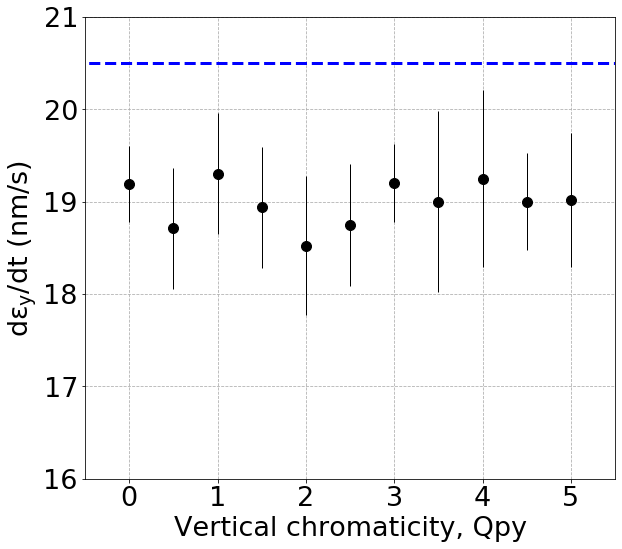

In [28]:
for i, key in enumerate(my_df_keys):
    plt.errorbar(my_variables[i], np.mean(my_df[my_df_keys[i]]['m'])*1e9, yerr=np.std(my_df[my_df_keys[i]]['m'])*1e9, marker='o',  c='k')

plt.hlines(expected_growth*1e9, -1, 7, linestyles='dashed', linewidth=3, color='b')
plt.xlim(-0.5, 5.5)
plt.ylim(16, 21)
plt.grid(linestyle='dashed')
plt.ylabel(r'$\mathrm{d\epsilon_y / dt \ (nm/s)}$')
plt.xlabel('Vertical chromaticity, Qpy')

#plt.savefig('dey_Qy.png')

compute tune spread from chroma and octupoles and chromatic sextupoles 

chromatic effect is not importnat, the detuning from the chromatic sextupoles is differnet at each case ??